In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
base_dir = '../Dataset/'
train_dir = os.path.join(base_dir, 'train/redness')
validation_dir = os.path.join(base_dir, 'validation/redness')

In [3]:
def resize_image(image):
    return tf.image.resize(image, [150, 150])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=resize_image
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 370 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\MAZEN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


C:\Users\MAZEN\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 12/100 ━━━━━━━━━━━━━━━━━━━━ 1:03 716ms/step - accuracy: 0.5416 - loss: 0.6899

c:\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.5835 - loss: 0.6839 - val_accuracy: 0.9667 - val_loss: 0.6508
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.7328 - loss: 0.6490 - val_accuracy: 0.9167 - val_loss: 0.5689
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.7620 - loss: 0.5804 - val_accuracy: 0.8667 - val_loss: 0.4618
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.7813 - loss: 0.5015 - val_accuracy: 1.0000 - val_loss: 0.2981
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.8819 - loss: 0.3821 - val_accuracy: 1.0000 - val_loss: 0.1823
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.8948 - loss: 0.2906 - val_accuracy: 1.0000 - val_loss: 0.1125
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9504 - loss: 0.2017 - val_accuracy: 1.0000 - val_loss: 0.0777
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 109ms/step - accuracy: 0.9396 - loss: 0.1580 - val_a

In [8]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - accuracy: 0.9785 - loss: 0.0790
Validation Accuracy: 98.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


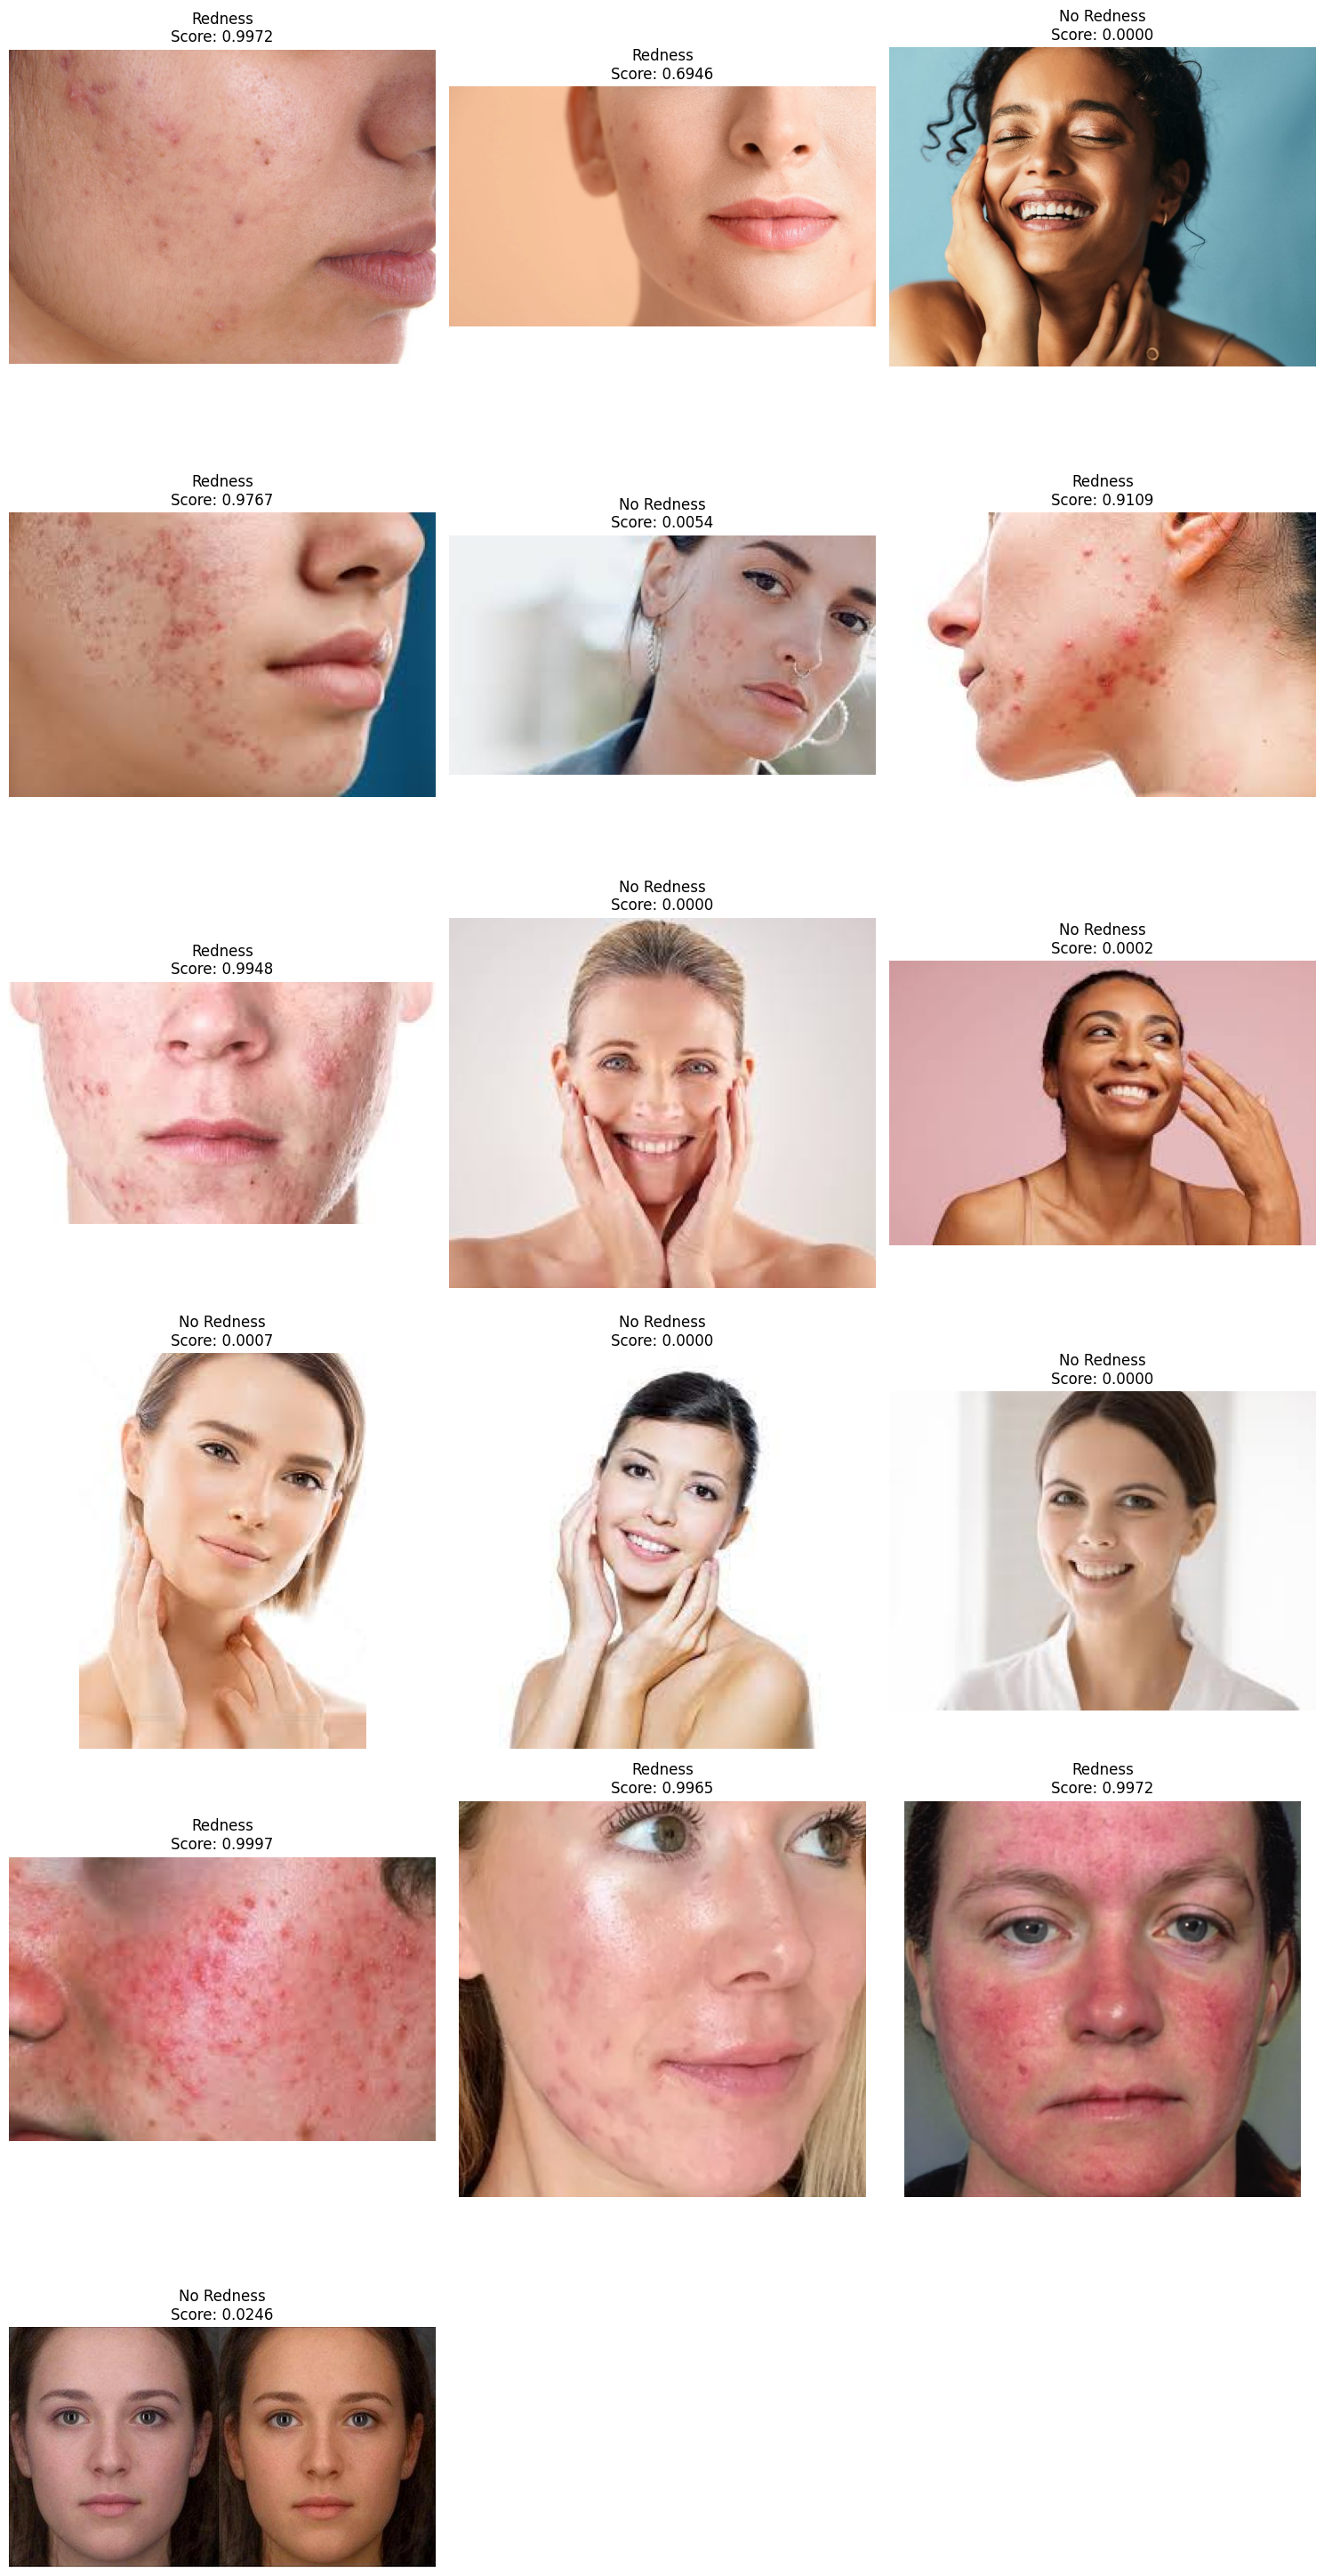

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Path ke folder 'test'
test_folder_path = base_dir + 'test/redness'  # Ganti dengan path folder Anda
test_folder_path2 = 'test terbaru'  # Ganti dengan path folder Anda

# Dapatkan daftar semua file gambar di folder 'test'
test_image_paths = [os.path.join(test_folder_path2, fname) for fname in os.listdir(test_folder_path2) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Set up the plot
num_images = len(test_image_paths)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols  # Ensure enough rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Proses dan prediksi semua gambar
for idx, img_path in enumerate(test_image_paths):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Load dan preprocess gambar
    test_image = load_and_preprocess_image(img_path)
    
    # Lakukan prediksi
    prediction = model.predict(test_image)
    prediction_score = prediction[0][0]  # Assuming the model returns a list with one item
    prediction_class = 'Redness' if prediction_score > 0.5 else 'No Redness'
    
    # Tampilkan gambar dan hasil prediksi
    ax.imshow(load_img(img_path))
    ax.set_title(f'{prediction_class}\nScore: {prediction_score:.4f}')
    ax.axis('off')

# Hapus subplot kosong jika ada
for j in range(idx + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [10]:
model.save('redness.h5')